# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

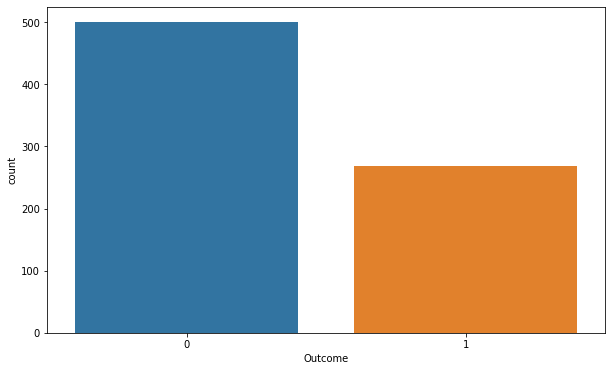

In [8]:
sns.countplot(df.Outcome)

<AxesSubplot:xlabel='Pregnancies'>

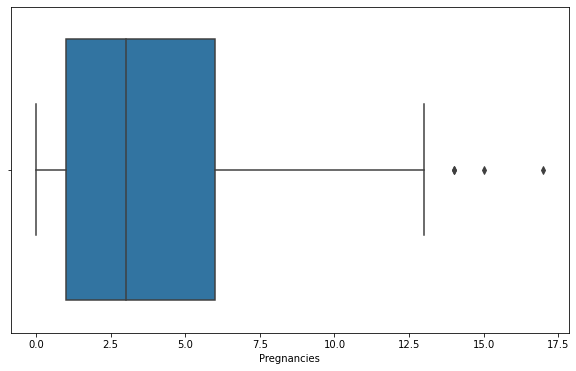

In [9]:
sns.boxplot(df.Pregnancies)

In [10]:
df=df[df.Pregnancies<13]

<AxesSubplot:xlabel='Pregnancies'>

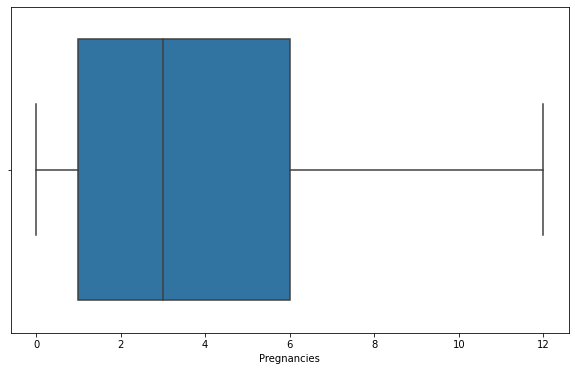

In [11]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

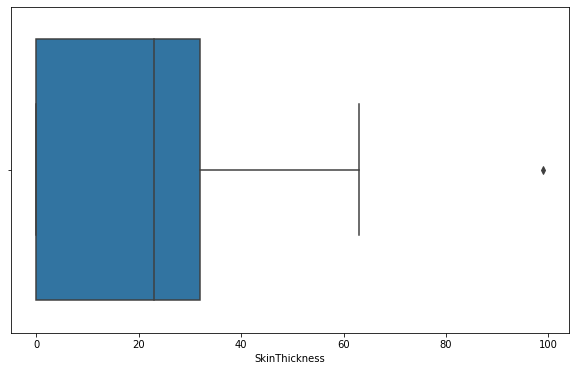

In [12]:
sns.boxplot(df.SkinThickness)

In [13]:
df=df[df.SkinThickness<70]

<AxesSubplot:xlabel='SkinThickness'>

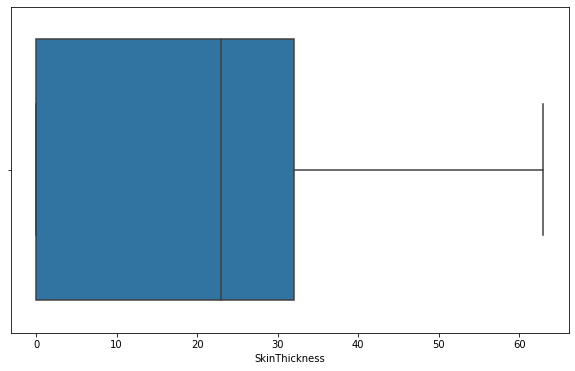

In [14]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

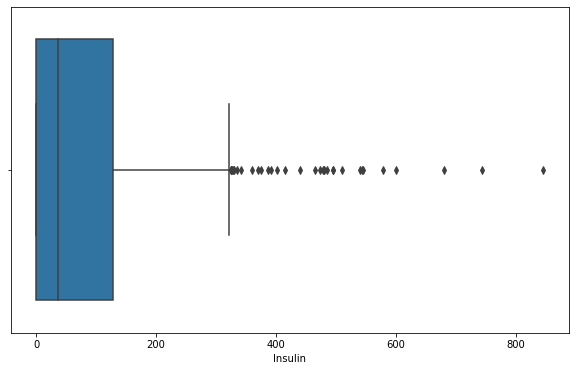

In [15]:
sns.boxplot(df.Insulin)

# zaten diabet hastalarında insulin değeri çok yüksek olur. bu yüzden bu yüksek değerleri outlier olarak değerlendirmiyoruz.

<AxesSubplot:xlabel='Glucose'>

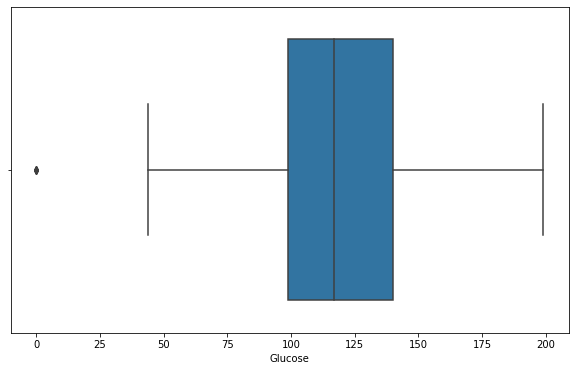

In [16]:
sns.boxplot(df.Glucose)

# şeker düzeyi kimsede 0 olamaz bu yüzden 0 altında olanları almıyoruz.

In [17]:
df=df[df.Glucose>0]

# glucose değeri 0 dan büyük olanları alıyoruz.

<AxesSubplot:xlabel='Glucose'>

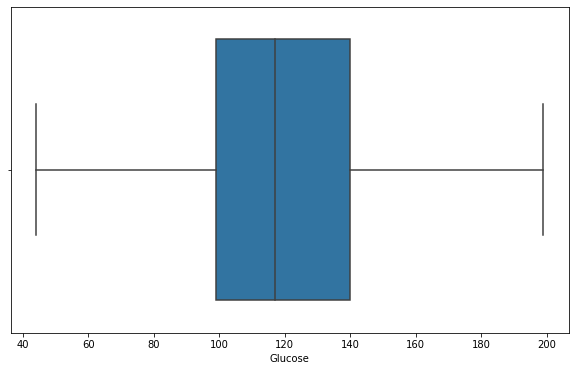

In [18]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

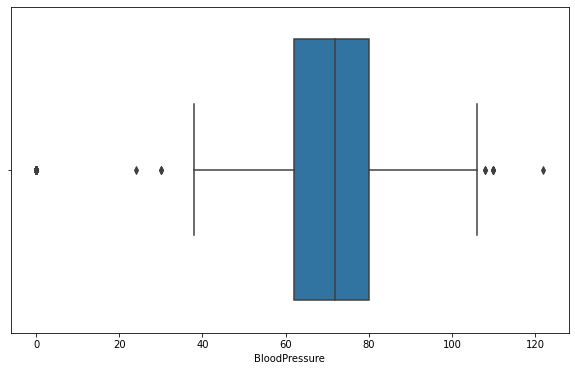

In [19]:
sns.boxplot(df.BloodPressure)

In [20]:
df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BloodPressure'>

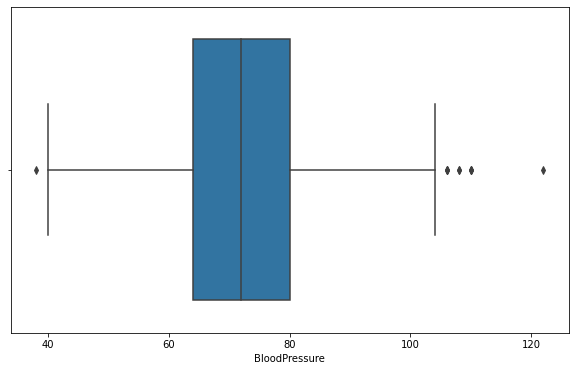

In [21]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BMI'>

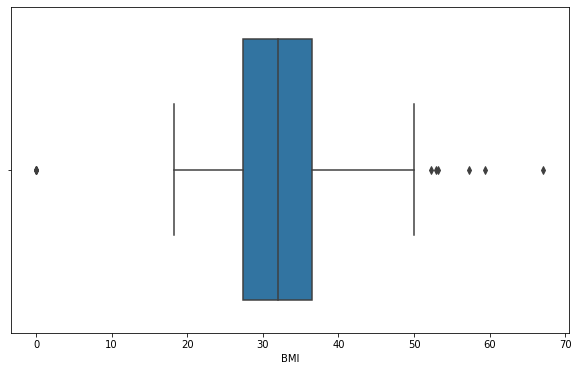

In [22]:
sns.boxplot(df.BMI)

# vücut kitle indeksi

In [23]:
df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

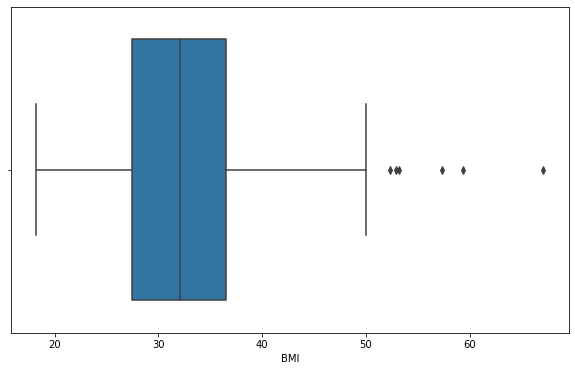

In [24]:
sns.boxplot(df.BMI)

In [25]:
df.shape

(707, 9)

In [26]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

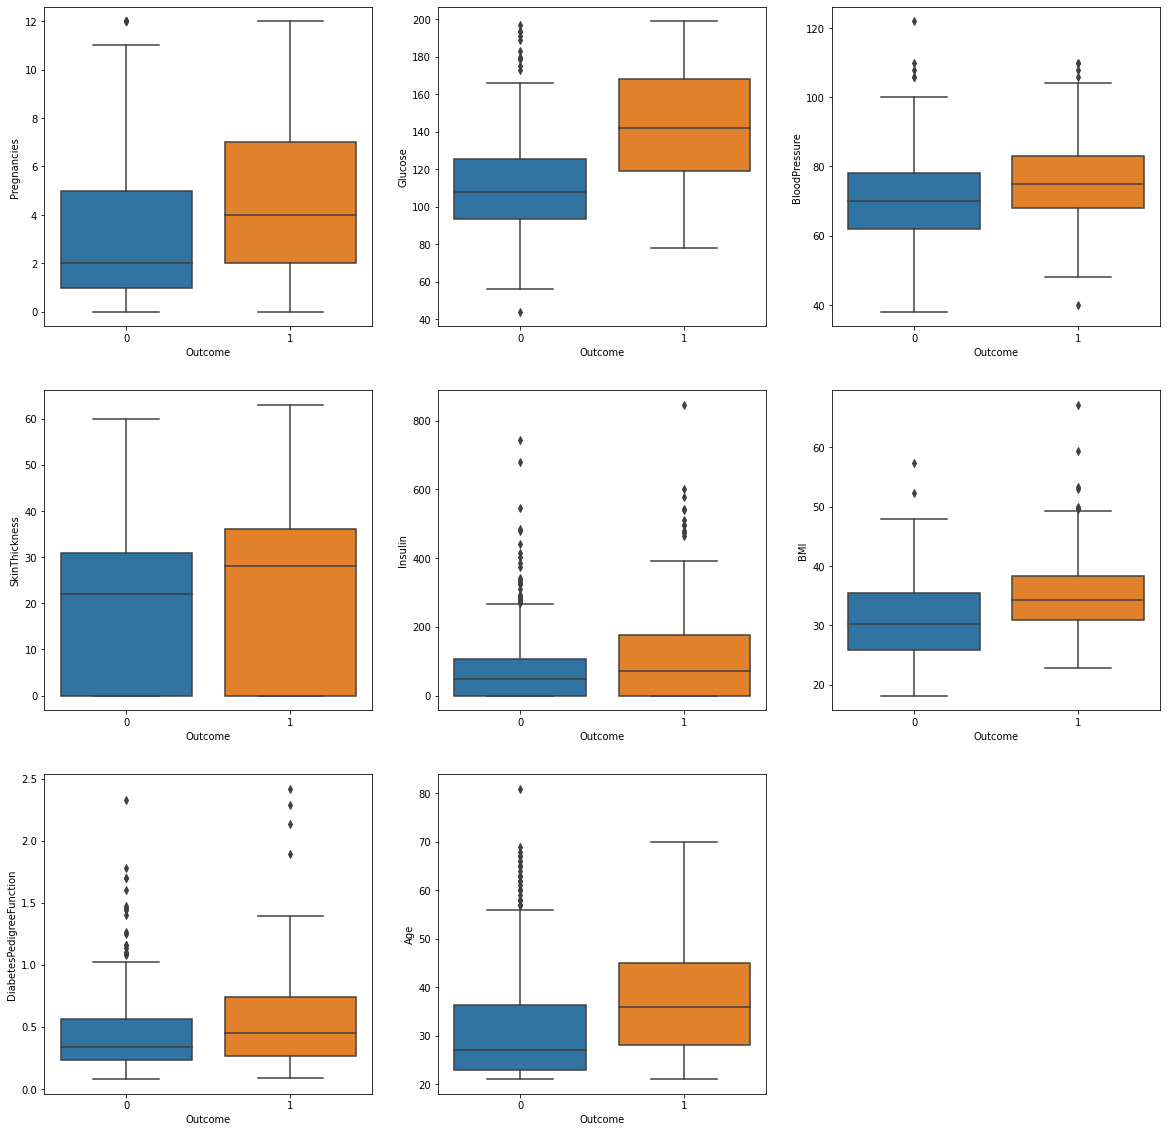

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

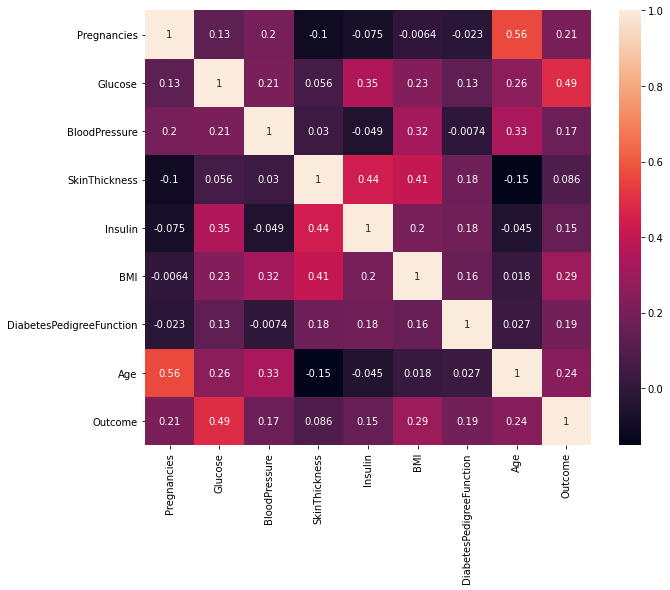

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

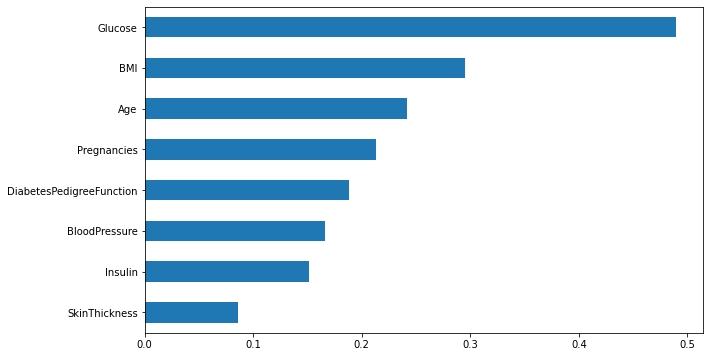

In [29]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

# diğer feature ların outcome (target) a göre corr larına bakıyoruz. 
# kendi ile corr'u 1 olacağı için ona bakmaya gerek yok. 

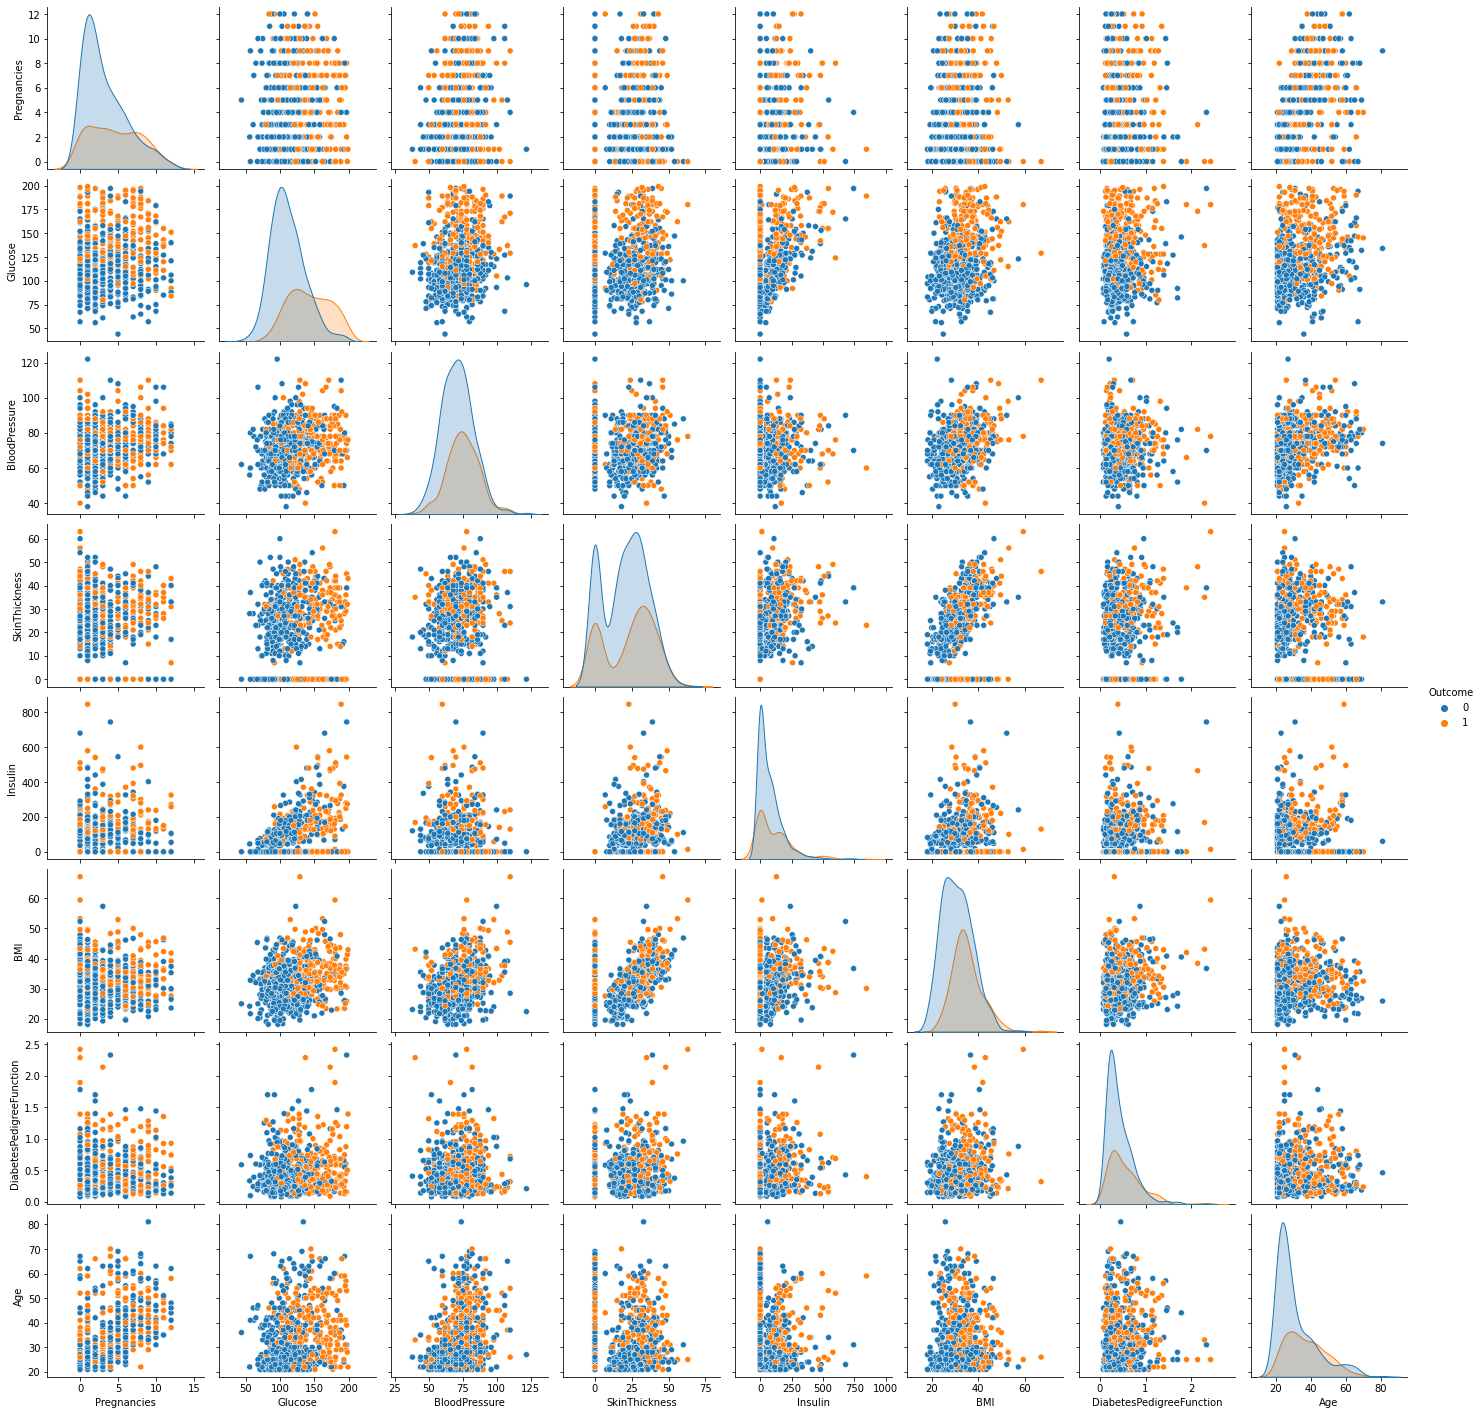

In [30]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split and Scaling

In [31]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)  # fit ve transformu beraber aynı kod ile yaptık.

X_test_scaled = scaler.transform(X_test)

## Modelling

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression(class_weight = "balanced")

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

# 'balanced' mode, giriş verilerindeki sınıf frekanslarıyla ters orantılı ağırlıkları otomatik olarak ayarlamak için y değerlerini kullanır.

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [39]:
y_pred=log_model.predict(X_test_scaled)

In [40]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)  # test_data'yı geçici olarak kullancağım. amacım outcome ile predleri kıyaslamak.
test_data["pred"] = y_pred  # test_datama pred değerlerimi ekliyorum
test_data["pred_proba"] = y_pred_proba[:,1]   # proba değerlerimi ekliyorum. 1 olma olasılıklarını kullanacağım dolayısıyla listedik 2. elemanları aldım.
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
215,12,151,70,40,271,41.800,0.742,38,1,1,0.951
366,6,124,72,0,0,27.600,0.368,29,1,0,0.400
546,5,187,76,27,207,43.600,1.034,53,1,1,0.987
436,12,140,85,33,0,37.400,0.244,41,0,1,0.855
432,1,80,74,11,60,30.000,0.527,22,0,0,0.080
334,1,95,60,18,58,23.900,0.260,22,0,0,0.060
61,8,133,72,0,0,32.900,0.270,39,1,1,0.674
359,1,196,76,36,249,36.500,0.875,29,1,1,0.944
764,2,122,70,27,0,36.800,0.340,27,0,0,0.447
307,0,137,68,14,148,24.800,0.143,21,0,0,0.186


## Model Performance on Classification Tasks

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
# scores with "class_weight = "balanced"

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93 32]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       125
           1       0.55      0.75      0.63        52

    accuracy                           0.75       177
   macro avg       0.71      0.75      0.72       177
weighted avg       0.78      0.75      0.75       177



## Cross Validate

In [44]:
from sklearn.model_selection import cross_validate

In [77]:
model = LogisticRegression(class_weight = "balanced")  #cross val. yaparken baştan yeni bir model objecti oluşturuyorum.

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores
df_scores.mean()[2:]

test_accuracy    0.743
test_precision   0.621
test_recall      0.689
test_f1          0.651
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [46]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

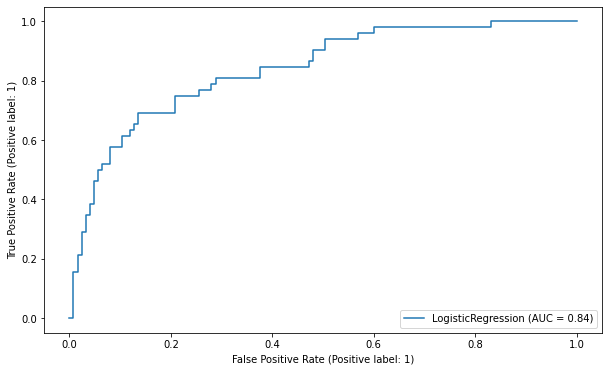

In [47]:
plot_roc_curve(log_model, X_test_scaled, y_test);

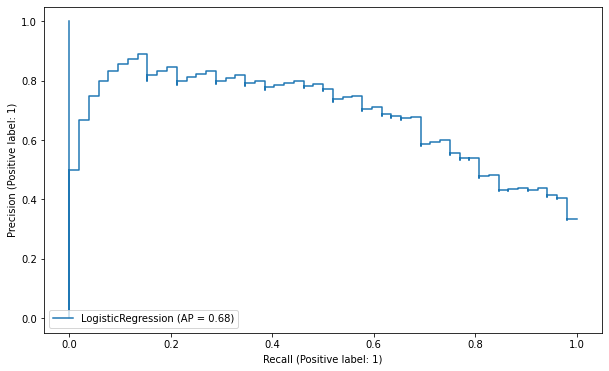

In [48]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Finding Best Threshold

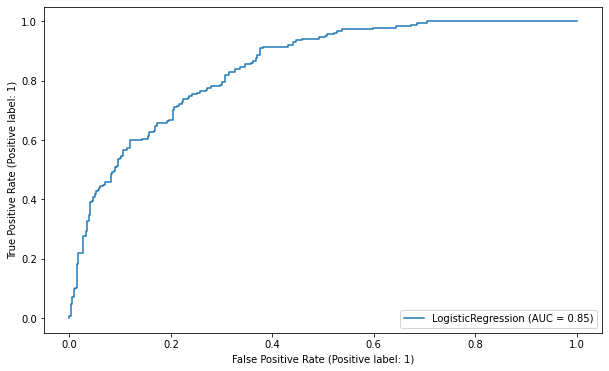

In [49]:
plot_roc_curve(log_model, X_train_scaled, y_train);

# Dikkat! aşağıdaki grafik 1 olma durumuna göre çizildi.

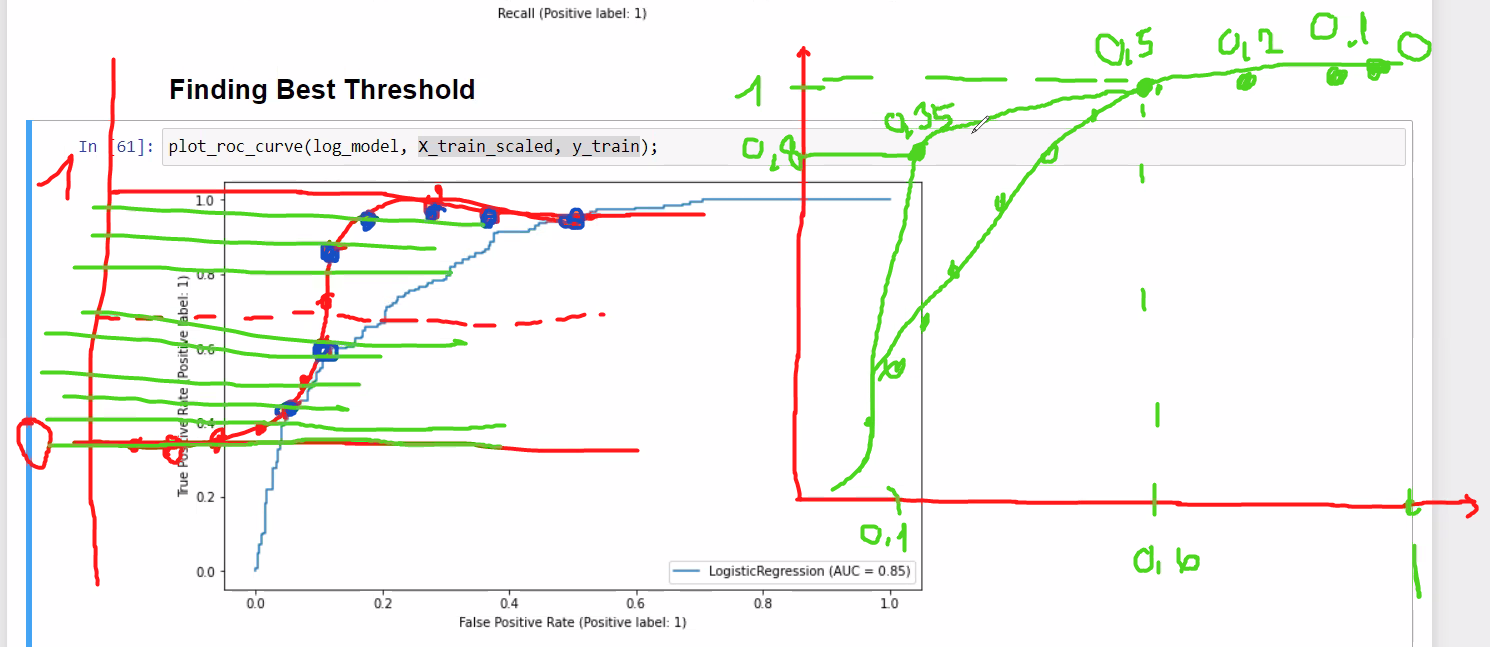

In [50]:
y_pred_proba = log_model.predict_proba(X_train_scaled)  # predict_proba: prediction ımın 1 ve 0 olma olasılıklarını veriyor.

roc_auc_score(y_train, y_pred_proba[:,1])

# True pos.rate-False Pos.rate curve grafiğindeki AUC=0.85 değerinin teyidi maksadıyla roc_auc_score() fonksiyonu kullanılarak bu değer tekrar bulundu.

0.8455278215182177

In [51]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [52]:
optimal_idx = np.argmax(tp_rate - fp_rate)  # index değerini veriyor. kaç numaralı index en iyi thresholdun olduğu index.
optimal_threshold = thresholds[optimal_idx]  # bu indeksteki threshold yani best threshold değerim.
optimal_threshold

0.34353888827104834

In [53]:
test_data.head()

# birazdan bu tabloya bir sütun daha oluşturacağım ve ona pred_2 diyeceğim. bu benim yukarda bulduğum best threshold değerine göre sonuçları verecek.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
524,3,125,58,0,0,31.600,0.151,24,0,0,0.345
94,2,142,82,18,64,24.700,0.761,21,0,0,0.428
90,1,80,55,0,0,19.100,0.258,21,0,0,0.025
228,4,197,70,39,744,36.700,2.329,31,0,1,0.990
351,4,137,84,0,0,31.200,0.252,30,0,1,0.503


In [54]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [78]:
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba,pred2
22,7,196,90,0,0,39.800,0.451,41,1,1,0.978,1
150,1,136,74,50,204,37.400,0.399,24,0,1,0.505,1
428,0,135,94,46,145,40.600,0.284,26,0,1,0.512,1
2,8,183,64,0,0,23.300,0.672,32,1,1,0.889,1
315,2,112,68,22,94,34.100,0.315,26,0,0,0.278,0
701,6,125,78,31,0,27.600,0.565,49,1,1,0.521,1
307,0,137,68,14,148,24.800,0.143,21,0,0,0.186,0
146,9,57,80,37,0,32.800,0.096,41,0,0,0.090,0
396,3,96,56,34,115,24.700,0.944,39,0,0,0.202,0
303,5,115,98,0,0,52.900,0.209,28,1,1,0.781,1


In [56]:
y_pred2 = test_data["pred2"]

In [57]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[70 55]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       125
           1       0.44      0.85      0.58        52

    accuracy                           0.64       177
   macro avg       0.67      0.70      0.64       177
weighted avg       0.76      0.64      0.66       177



In [58]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[93 32]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       125
           1       0.55      0.75      0.63        52

    accuracy                           0.75       177
   macro avg       0.71      0.75      0.72       177
weighted avg       0.78      0.75      0.75       177



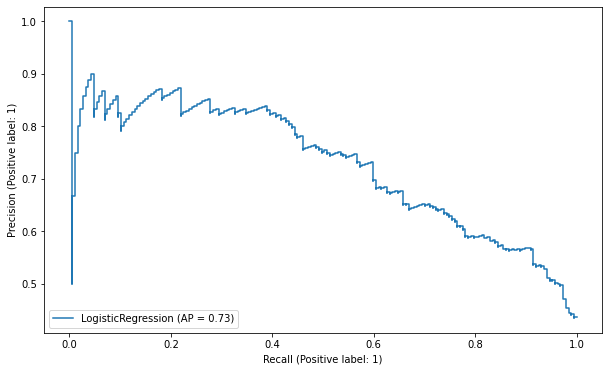

In [59]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [60]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

# plot_precision_recall_curve() ile bulduğum AP = 0.73 değerini teyid etmek için average_precision_score() fonk. kullandım.

0.7260867629538448

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [62]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# benim precision ile recall arasındaki ilişkiyi veren zaten bir skorum var (f1_score). 
# dolayısıyla burada f1_score denklemini--> (2 * precisions * recalls) / (precisions + recalls) kullandım.

0.34353888827104834

## Final Model and Model Deployment

In [79]:
scaler = StandardScaler().fit(X)

In [64]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

# X değerlerimin scale ile fit edilmiş halini scaler_diabetes te sakladım.

In [65]:
X_scaled = scaler.transform(X)

In [66]:
final_model = LogisticRegression(class_weight = "balanced").fit(X_scaled, y)

In [67]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [68]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,707.000,3.702,3.121,0.000,1.000,3.000,6.000,12.000
Glucose,707.000,121.734,30.657,44.000,99.000,117.000,141.000,199.000
BloodPressure,707.000,72.481,12.012,38.000,64.000,72.000,80.000,122.000
SkinThickness,707.000,21.296,15.422,0.000,0.000,24.000,33.000,63.000
Insulin,707.000,85.262,117.940,0.000,0.000,49.000,133.500,846.000
BMI,707.000,32.372,6.847,18.200,27.400,32.100,36.500,67.100
DiabetesPedigreeFunction,707.000,0.476,0.334,0.078,0.245,0.378,0.630,2.420
Age,707.000,33.139,11.729,21.000,24.000,29.000,40.000,81.000


In [69]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [70]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [71]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [72]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.22495888, -0.15452894, -0.04006354,  0.11059814, -0.31615997,
        -0.0543865 , -0.28684307, -0.35310219],
       [ 0.73701246,  0.59623148,  0.62640516,  0.75950177,  0.3965681 ,
         0.60327464,  0.46316082,  0.58540625],
       [ 0.41635535, -0.05660367,  0.20986223,  0.24037887, -0.25676596,
         0.23790734, -0.07684198, -0.01182639]])

In [73]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [74]:
predictions = final_model.predict(sample_scaled)   # bu threshold 0.5 ile yapılmış prediction.

predictions_proba = final_model.predict_proba(sample_scaled)  # 0.5 threshold ile yapılmış prediction ların proba değeleri.

predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]] # best threshold uygulayarak bulacağım 1 ve 0 lardan 1 lerin oranlarını çektim.

In [75]:
# yukarda bulduğum değerleri sütun haline getirip sample dataframe içinde görmek istiyorum

sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample["pred2"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred,pred2
0,3,117,72,23,48,32.000,0.380,29,0.332,0,0
1,6,140,80,33,132,36.500,0.630,40,0.781,1,1
2,5,120,75,25,55,34.000,0.450,33,0.489,0,1
